# BRAZO ROBOT

## Resumen
Para construir un brazo robot didactico tenemos que trabajar en varios aspectos que incluyen:
- Mecanica
- Motores
- Electronica
- Programacion


Se describira cada una de las partes del brazo didactico, se utilizara un Arduino uno como microcontrolador. El cual se muestra en la figura
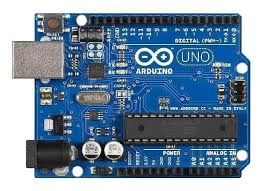


Los motores que se usaran son del tipo de servomotor.
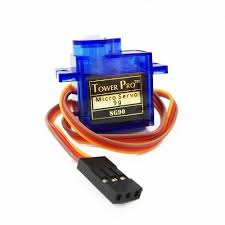

Las piezas mecanicas se construyen de carton. Para unir las partes se utiliza silicona. En la figura se muestra el brazo terminado.
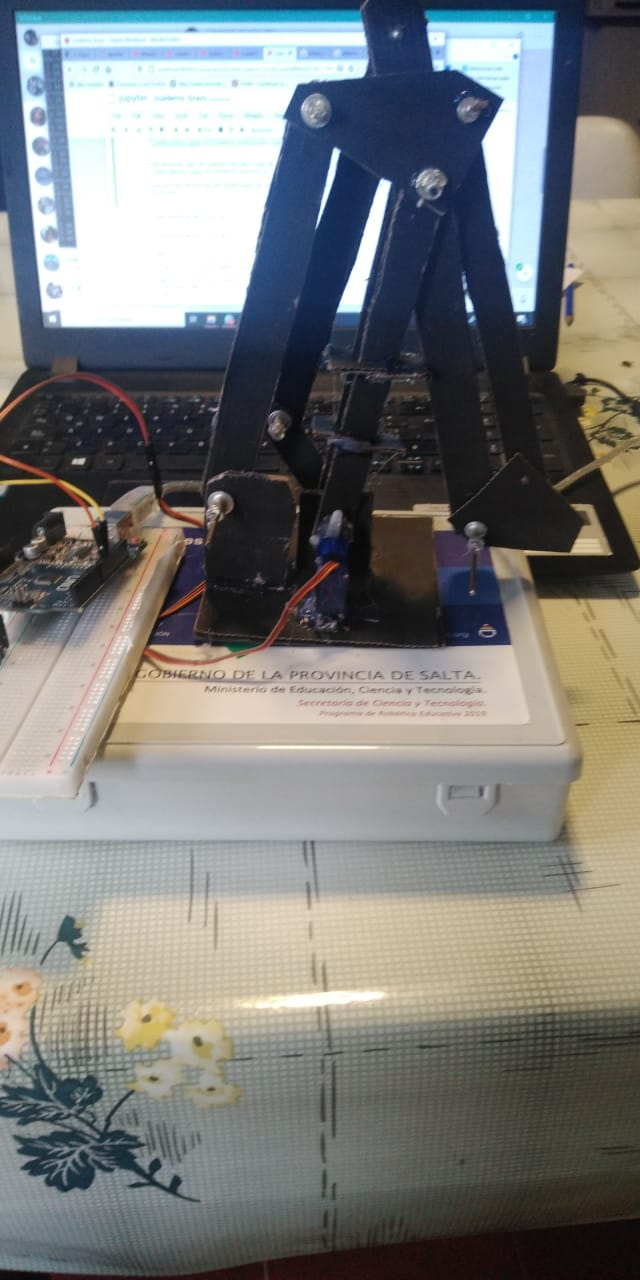



## Armado de las partes mecanicas del robot

Para construir el brazo se utiliza carton, para unir las piezas movibles se utiliza remaches pop, los cuales deben ser desarmados para utilizar los mismos como bujes. En la figura se muestra un remache desarmado y cortado.
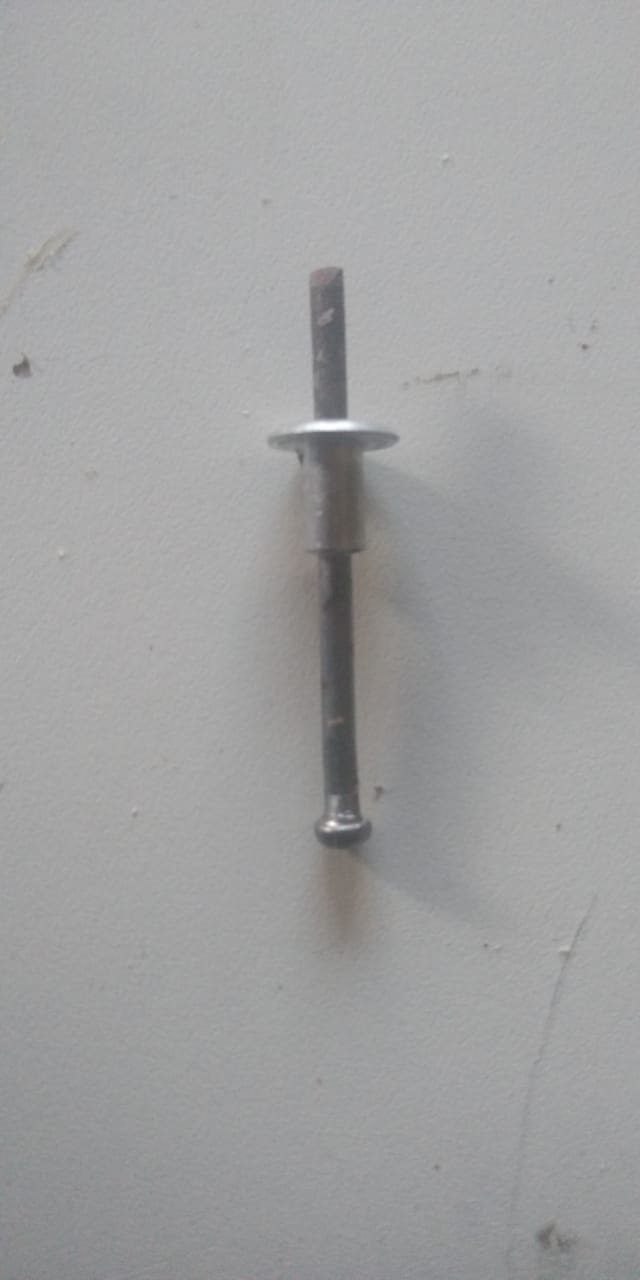

Empecemos a armar nuestro brazo. Para comenzar debemos construir dos rectangulos de carton de 16 cm de largo y 1 cm de ancho. Los cuales deben tener dos orificios en el medio separados entre si 15 cm y un apoyo que debe tener un remache como se muestra en la figura.
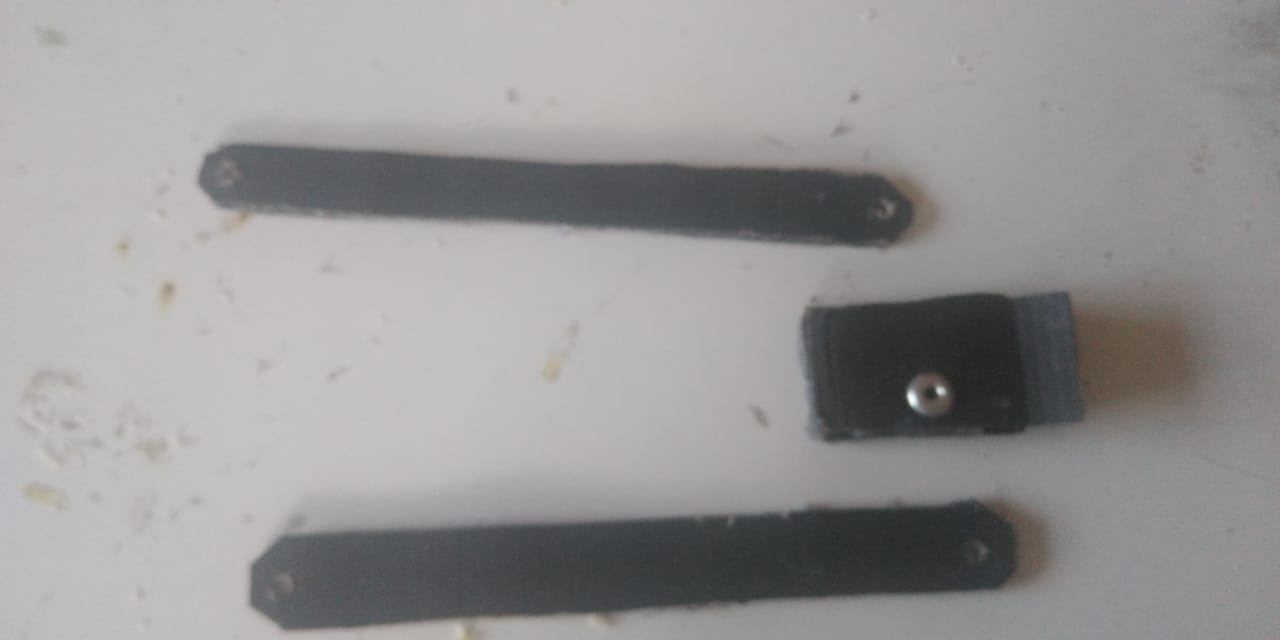

Se deben unir los dos rectangulos con el apoyo utilizando el remache como se muestra en la figura
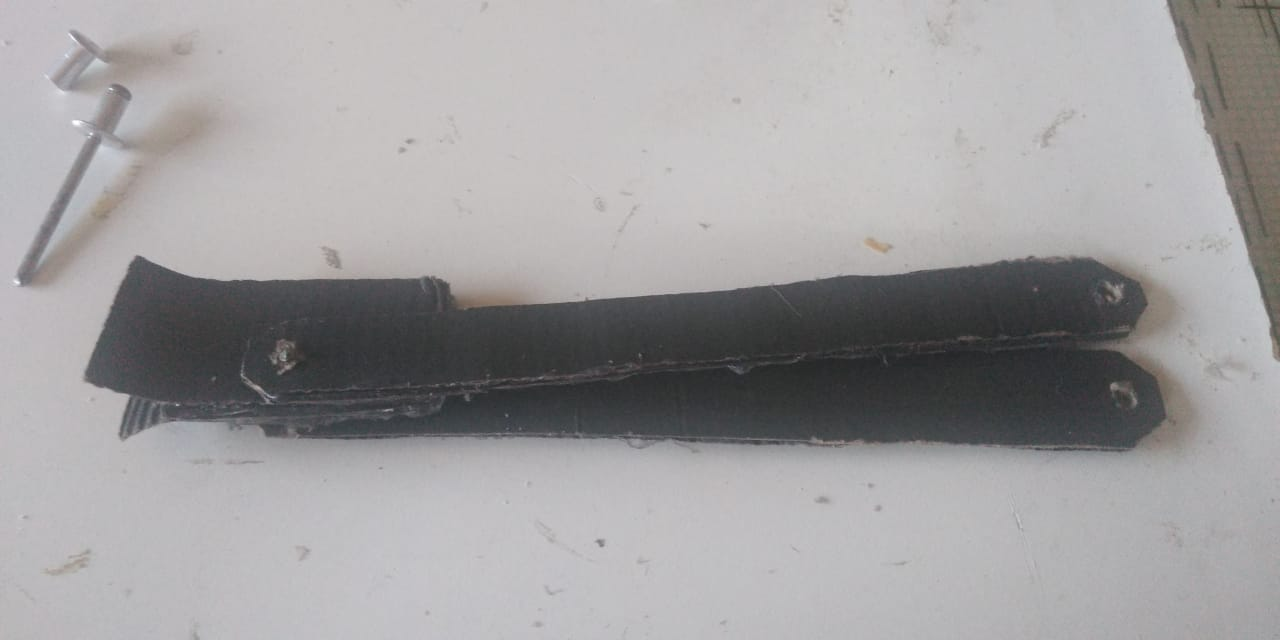
Se colocan separadores de carton
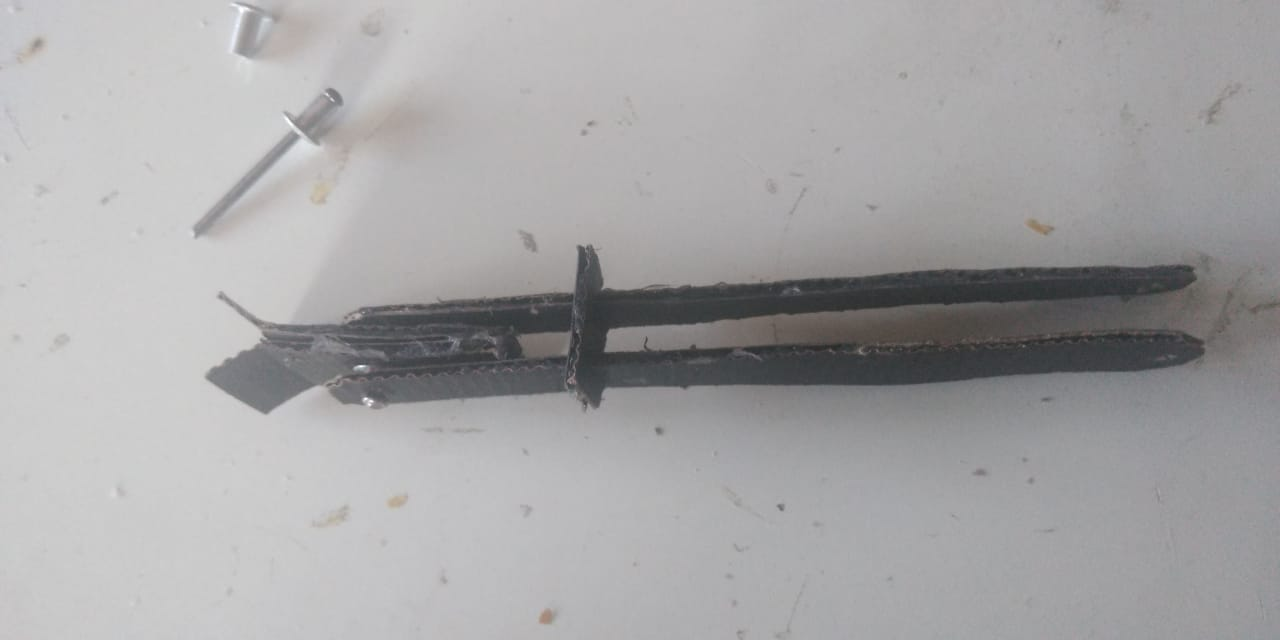
Se construye un rectangulo de 21 cm de largo y 1 cm de ancho con tres orificios alineados en el medio, uno a 0,5 cm el siguiente con un remache en el orifico ubicado a 15.5 cm y finalmente otro a 20 cm com se muestra en la figura.
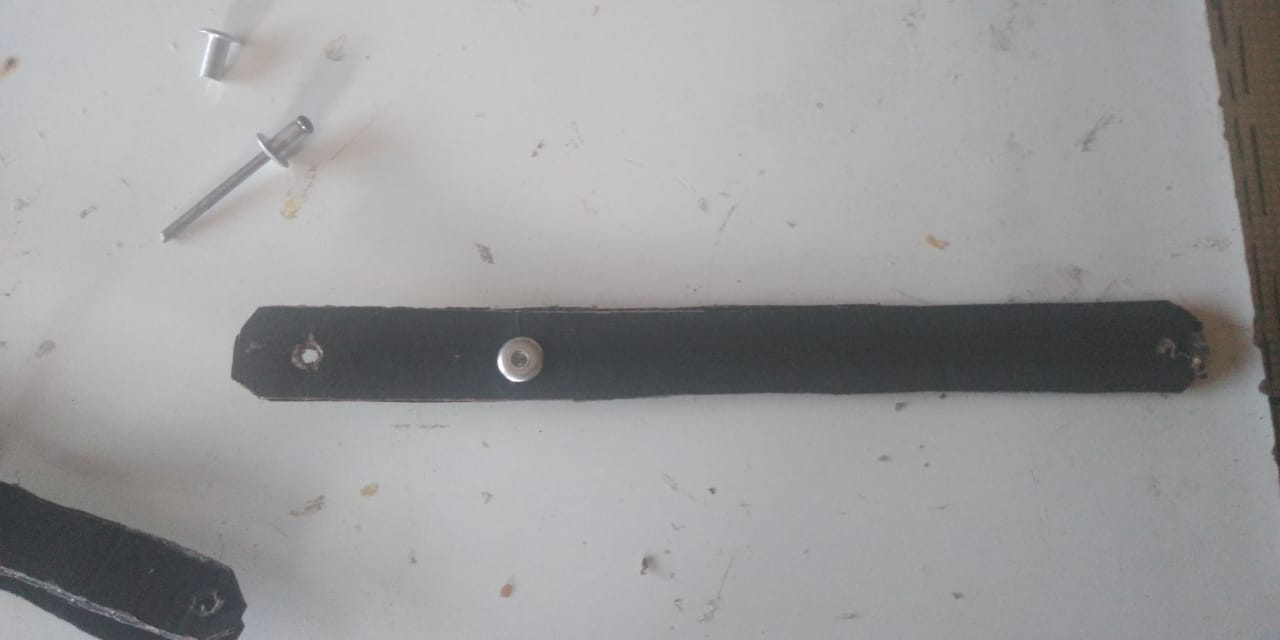

Se conecta a las piezas anteriores como se muestraa en la figura
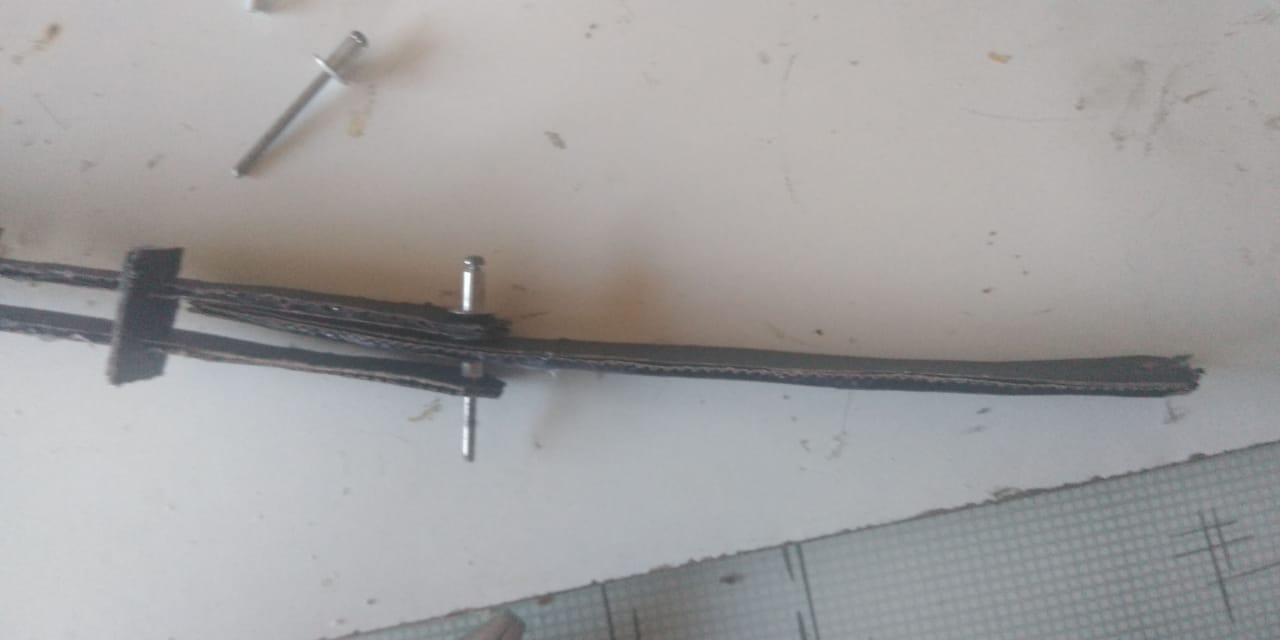
Se construye una base de 10 x 10 cm se realiza un agujero de 2cm por 3mm exactamente en el medio. Se coloca la pieza armada en la base como se muestra en la figura.
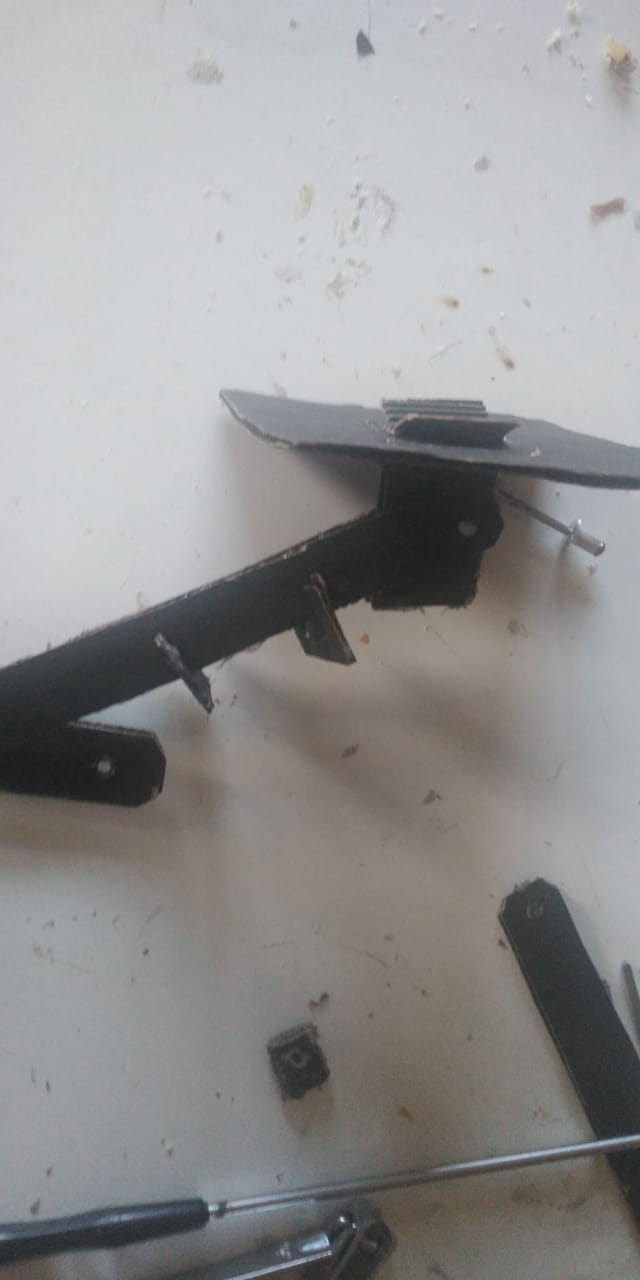
Finalmente el brazo queda asi
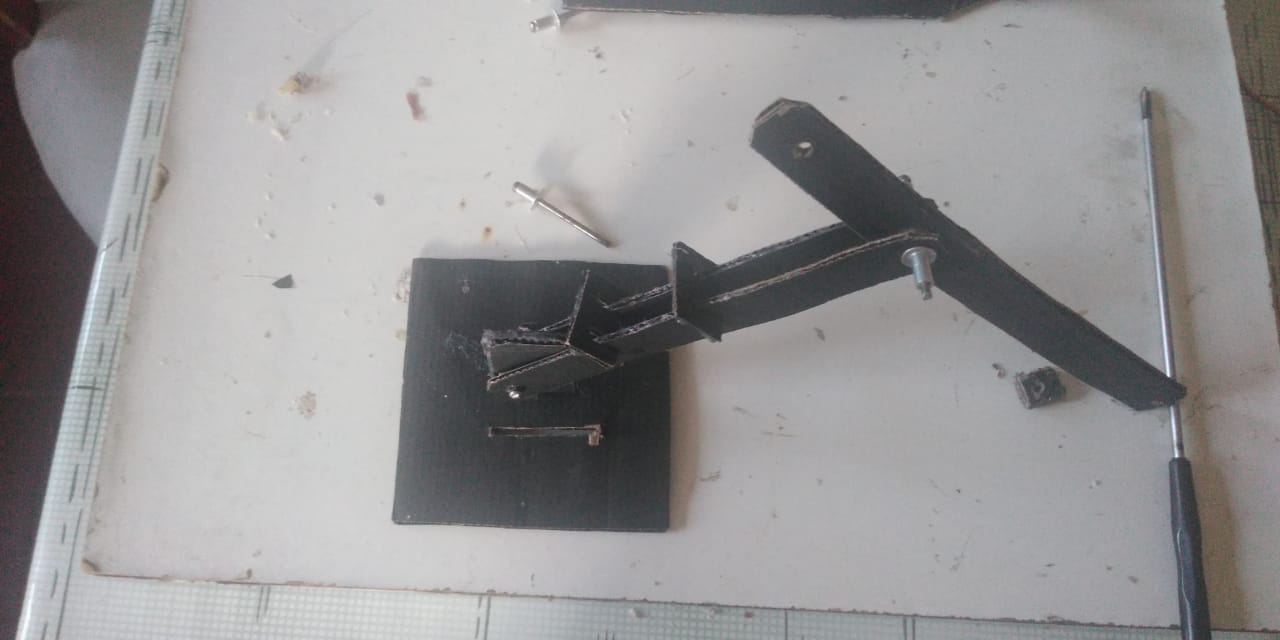
Sobre la pieza que corresponde al brazo se pega con silicona el brazo del servomotor
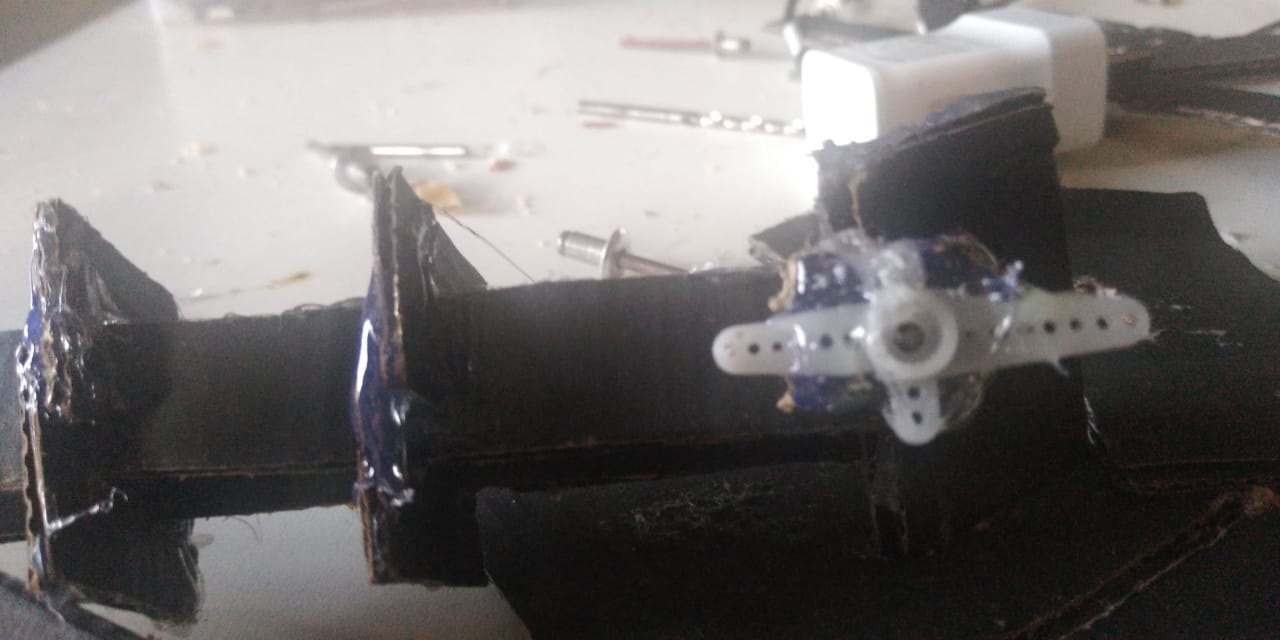
se deben realizar un rectangulo de 6cm de largo por uno de ancho con dos orificis centrados a 5 cm uno del otro. Otro rectangulo de 16cm x1 cm con dos orificios centrados separados entre si 15 cm. Se deben conectar entre si con el extremo libre del rectangulo de 20 cm. y colocar un brazo del servo al extremo libre del rectangulo de 5 cm.
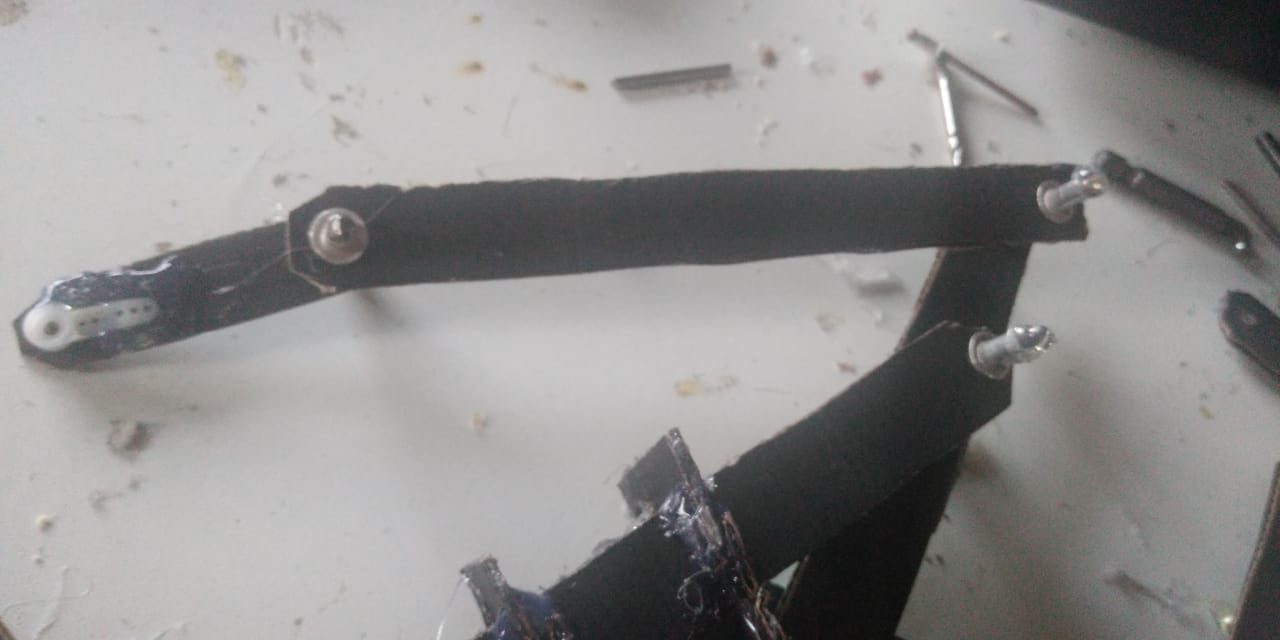
Se debe pegar los servos quedando el brazo robotico como la figura
![brazo_robot.jpg](attachment:brazo_robot.jpg)
Se deben conectar los servos al arduino, como se muestra en las figuras
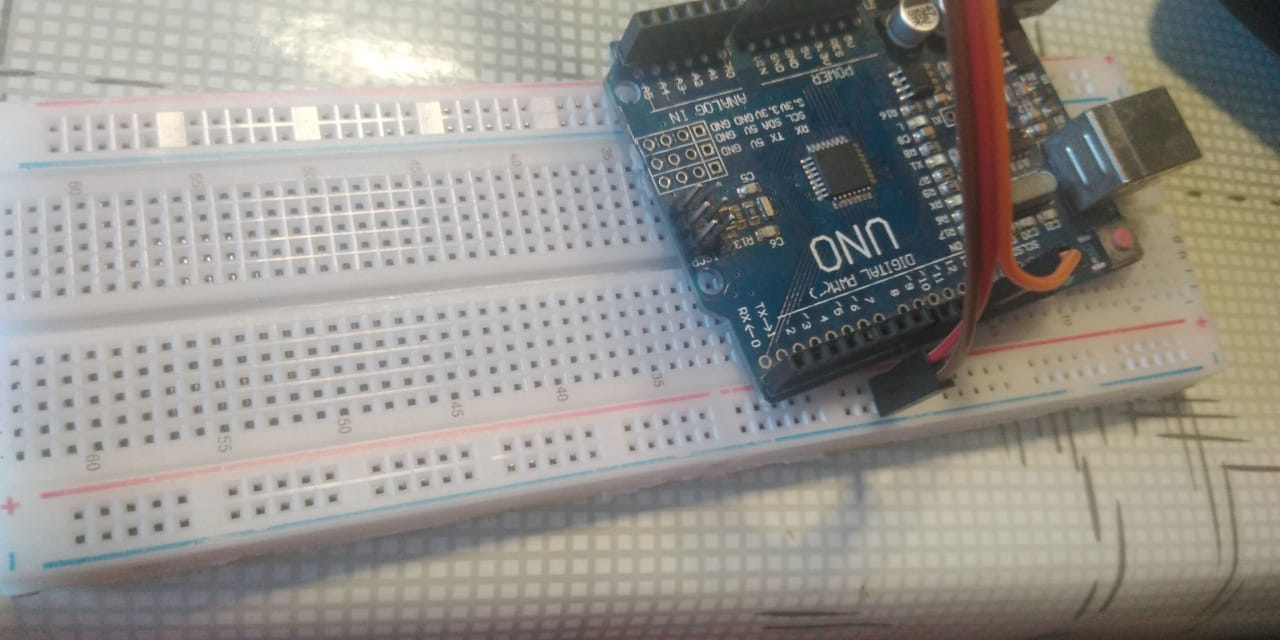

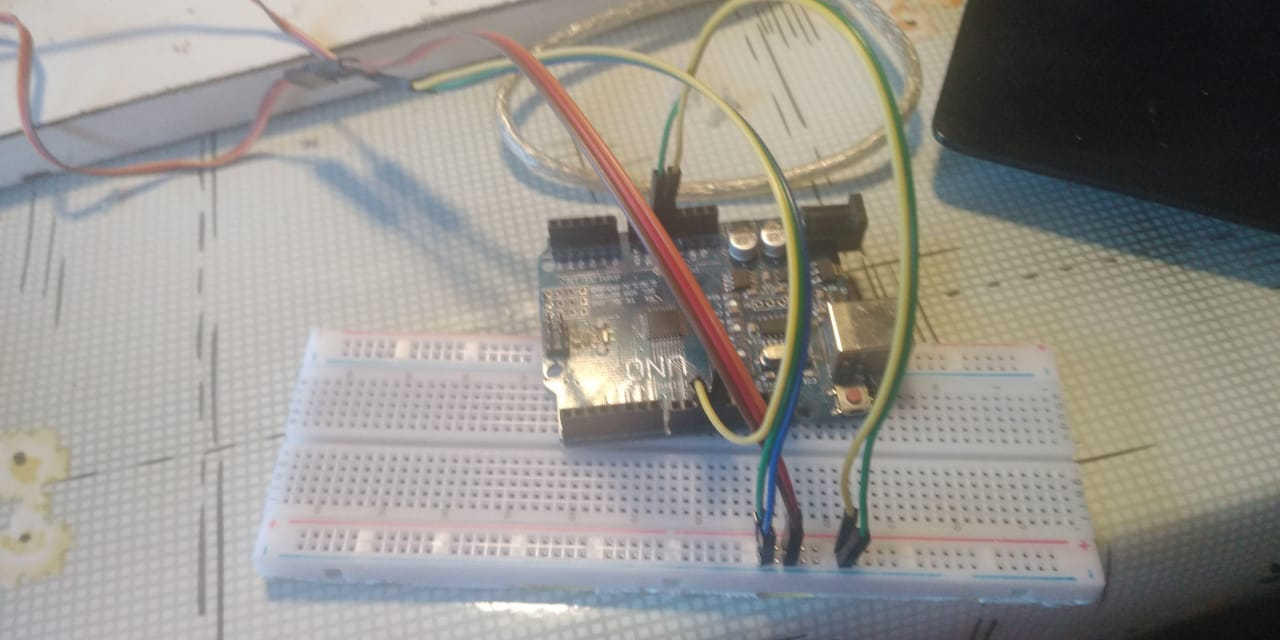

Las medidas de algunas piezas se muestran en la figura.
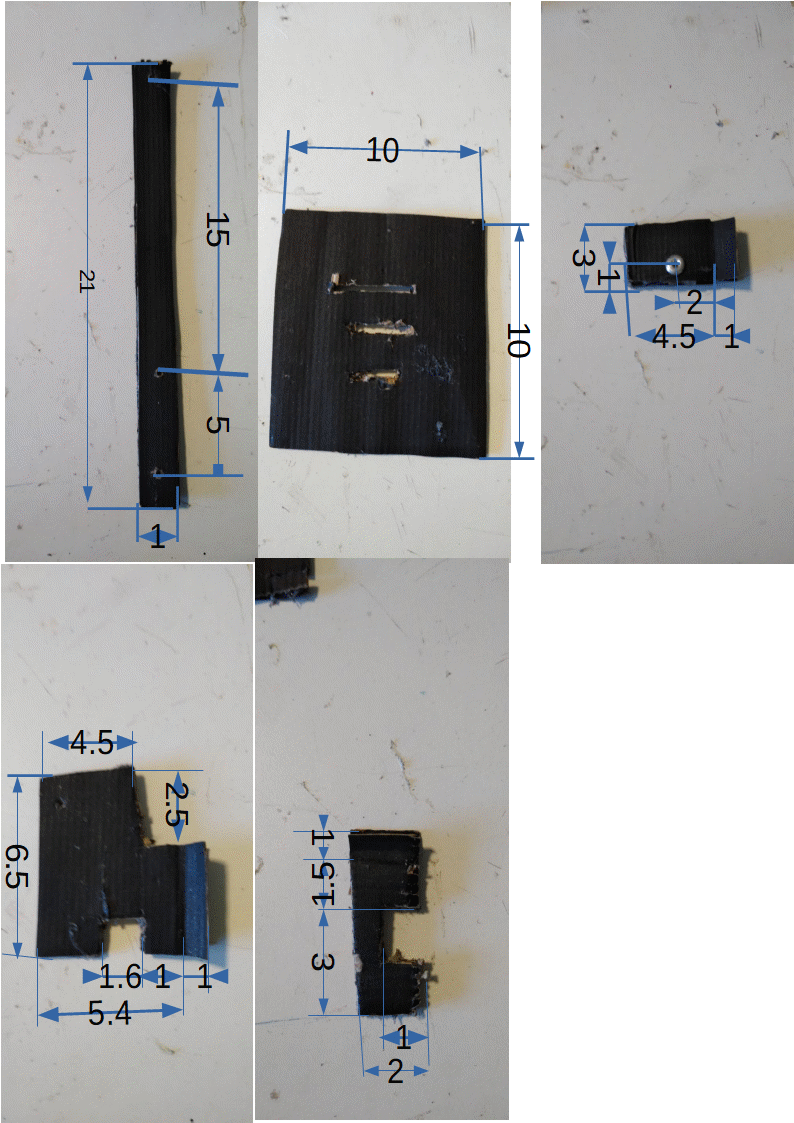




## Programacion del microcontrolador

### Servomotores

En esta seccion presentamos un programa sencillo para controlar un servomotor.

#include <Servo.h>  
Servo brazo;  
void setup() 
{
}
void loop() {  
  int i;  
   brazo.attach(11);   //brazo esta conectado ala pata 11  
   delay(10);  
   brazo.write(50);  
   delay(2000);  
   brazo.write(90);  
   delay(2000);  
   while (1)  
   {  
   brazo.detach();  
   }  
}

Se comienza cargando la libreria servo con la sentencia **#include <Servo.h>**

Luego se crea el objeto servo a partir del cual se utiliza el servomotor por el microcontrolador la sentencia es **Servo nombre_servo**

Para informar a que pin del micrcontrolador se conecta e utiliza la sentencia attach donde se debe escribire el mumero de pin donde se conectara el servomotor  **nombre_servo.attach(numero)**

Utilizando la sentencia write se ordena al servo el angulo en el cual se debe ubicar, la sentencia se muestra a continuacion
**nombre_servo.write(90)**

Finalmente la sentencia detach desconecta el servomotor **brazo.detach()**
   
 En este video se muestran detalles del funcionamiento del servomotor
 
[Servomotores](https://youtu.be/mk9UkQCeENc)

La posicion de reposo de los servomotores es 90°

### Puerto Serie
Un Puerto Serie (también denominado Puerto Serial) es la interfaz (conexión física y funcional entre dos dispositivos o sistemas) que posibilita el envío de información digital y a su vez también permite recibirla. En este caso se conecta el puerto serie del microcontrolador con el puerto serie de la PC donde se encuentra nuestro programa. Se debe destacar que el arduino utiliza para conectarse con una PC el puerto USB  configurado como puerto serie.

Se presenta un programa que permita controlar dos servomotores utilizando la puerta serie

#include <Servo.h>  //libreria donde encuentra la clase  

Servo brazo;  
Servo antebrazo;  

int ang_brazo = 90;  
int ang_antebrazo = 90;  

void setup() {  
  Serial.begin(9600);  
}  

void loop() {  
  int i;  
  char a;  
  String cad;  
  char control[5];  
  int valor;  

  brazo.attach(10);//brazo esta conectado al pin 11  
  antebrazo.attach(11);//antebrazo esta conectado al pin 10  

  if (Serial.available() > 0)//Pregunta si hay datos en el buffer del puerto serie  
  {  
    Serial.readBytes(control, 5);  //lee 5 byte de la puerta serie en control 
    if (control[0] == 'o')  
    {  
      Serial.print(control);  
      if (control[1] == '1')  
      {  
        cad = "";  
        cad = cad+control[2] + control[3] + control[4];    
        valor = cad.toInt();// convierte el valor medido a entero  
        brazo.write(valor);  //escribe en el servo  
      }  
      if (control[1] == '2')  
      {  
        cad = "";  
        cad = cad+control[2] + control[3] + control[4];  
        valor = cad.toInt();  
        antebrazo.write(valor);  
      }  
    }  
  }  
}  


## Puerta Serie en Jupyter notebook

Se utiliza la libreria serial

In [3]:
import serial


Luego se selecciona el puerto, debe ser el mismo que utiliza el microcontolador. Utilizando la sentencia mostrada en la siguiente linea

In [207]:
ser = serial.Serial('COM11')

In [ ]:
Para terminar el uso de la puerta serie se utiliza la siguiente sentencia

In [206]:
ser.close()

Para escribir en el puerto se debe usar la sentencia _*write*_. En este caso __o1120__. Es la orden que debe recibir el microcontrolador que tenga grabado el programa que se muestra mas arriba.

In [8]:
ser.write(b'o1120')

In [ ]:
Para leer un caracter se utiliza __read()__

In [ ]:
a=ser.read();

Para leer varios caracteres, por ejemplo 3. Se utiliza __read(3)__

In [ ]:
a=ser.read(3)

Para leer una linea. Se utiliza __readline()__

In [2]:
ma=ser.readline()

NameError: name 'ser' is not defined

Para vaciar el buffer sin cerrar se utiliza la sentencia __flush__

In [ ]:
ser.flush()

## Programacion orientada a eventos en jupyter notebook

La Programación orientada a eventos es un paradigma de programación en el que la estructura y la ejecución de los programas van determinados por los sucesos o acciones que ocurren en el sistema, definidos por el usuario o por el propio sistema. 

Con los lenguajes orientados a eventos se pueden realizar en poco tiempo aplicaciones sencillas y muy funcionales, utilizando interfaces gráficas en las que se insertan componentes o controles a los que se le programan eventos. 

 __Ipywidget__ es una  libreria que permite incorporar la programacion por eventos a jupyter notebook. 
la misma dispone de los siguientes botones:

| Nombre      |    Sintaxis         | Funcionamiento                                |
| :----------- | :----------- :     | ---:                                          | 
| Textos      | widgets.Text        | Permite ingresar textos o números al programa |
| Menu        | widgets.DropDown    | crea menu                                     |
| Calendarios |  widgets.DataPicker | crea calendarios                              |
| Selección   | widgets.checkpoint  | selecciona distintas opciones                 |
| Deslizadores| widgets.FloatSlider | ingresa numeros utilizando deslizadores       |
| Ejecucion   | widgetsButton       | ejecuta codigo                                |
| Letreros    | widgets.Label       | muestra letreros                              |
| Salida      | widgets.Out         | Presenta resultados                           |


Para comenzar debemos cargar las librerias utilizando las sentencias que se muestran mas abajo



In [7]:
# algunas funiones que se usaran
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets

### Presentamo la sintaxis de algunos botones


In [24]:
texto = widgets.Text(
       value='HOLA',
       description='Titulo', )
calendario = widgets.DatePicker(
           description='Select Date')
deslizador = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')
checkbox = widgets.Checkbox(
           description='Check to invert',)
boton = widgets.Button(description='Boton')
letrero=widgets.Label()
out = widgets.Output(value='Entrada')

Para ejecutar los botones se debe poner el nombre, por ejemplo se pone texto y se ejecuta

In [25]:
texto

Text(value='HOLA', description='Titulo')

El texto se encuentra en __Nombre.value__. Cambie el texto  y ejecute lo siguiente. Se obtiene una cadena de caracteres

In [28]:
texto.value

'HOLA'

Para organizar la ubicacion de las distintas partes se utilizan conentenedores. 
El contenedor horizontal se llama __HBox__ su sintaxis se muestra a continuacion

In [29]:
widgets.HBox([texto,menu])

El contenedor vertical se denomina __VBox__. Su sintaxis se muestra a continuacion

In [31]:
widgets.VBox([texto,menu])

La combinacion de ambos seria

In [32]:
b1=widgets.HBox([texto,menu])
b2=widgets.HBox([calendario, deslizador])
widgets.VBox([b1,b2])

### Creando un boton de ejecucion
Se crea el boton y una salida. Se define una funcion donde se realizaran las acciones. Finalmente se conecta con el widget

In [1]:
boton = widgets.Button(description='Boton')
out = widgets.Output()
def on_boton_click(_):
      with out:
          # Acciones
          clear_output()
          print('Algo paso!')# linking button and function together using a button's method
boton.on_click(on_boton_click)
# displaying button and its output together
widgets.HBox([boton,out])

NameError: name 'widgets' is not defined

In [ ]:
## Analis de la geometria del robot

## Primer programa
Combinando el uso de la libreria __serial__ con __ipywidgets__
Creamos dos widgets de texto, donde se ingresaran los angulos del brazo  y dos botones, uno mueve el brazo y el otro el antebrazo de nuestro robot

In [36]:
# librerias necesarias para el programa

from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import serial

#  definicion de botones
tang1 = widgets.Text(value='90',description='Ang 1=', )
tang2 = widgets.Text(value='90',description='Ang 2=', )
brazo = widgets.Button(description='Brazo')
abrazo = widgets.Button(description='Antebrazo')
lab1=widgets.Label(value="Entrada:")
lab2=widgets.Label(value="Salida:")
out = widgets.Output()
# Contenedores
b1=widgets.HBox([lab1,tang1,tang2 ])
b3=widgets.HBox([brazo,abrazo, out])


def on_brazo_click(_):
      with out:
          # Accione
          clear_output()
          to1= 'o1'+'{:03d}'.format(int(tang1.value))
          ser = serial.Serial('COM11')
          ser.write(bytearray(to1,'utf-8'))
          ser.close()
          print('o1= '+to1)
def on_abrazo_click(_):
      with out:
          # Accionesser = serial.Serial('COM11')
          ser = serial.Serial('COM11')
          ser.write(bytearray(to2,'utf-8'))
          ser.close()
          print('o2= '+to2)
boton.on_click(on_boton_click)
brazo.on_click(on_brazo_click)
abrazo.on_click(on_abrazo_click)


widgets.VBox([b1,b3])

## Geometria del brazo

Se analiza la geometria del brazo
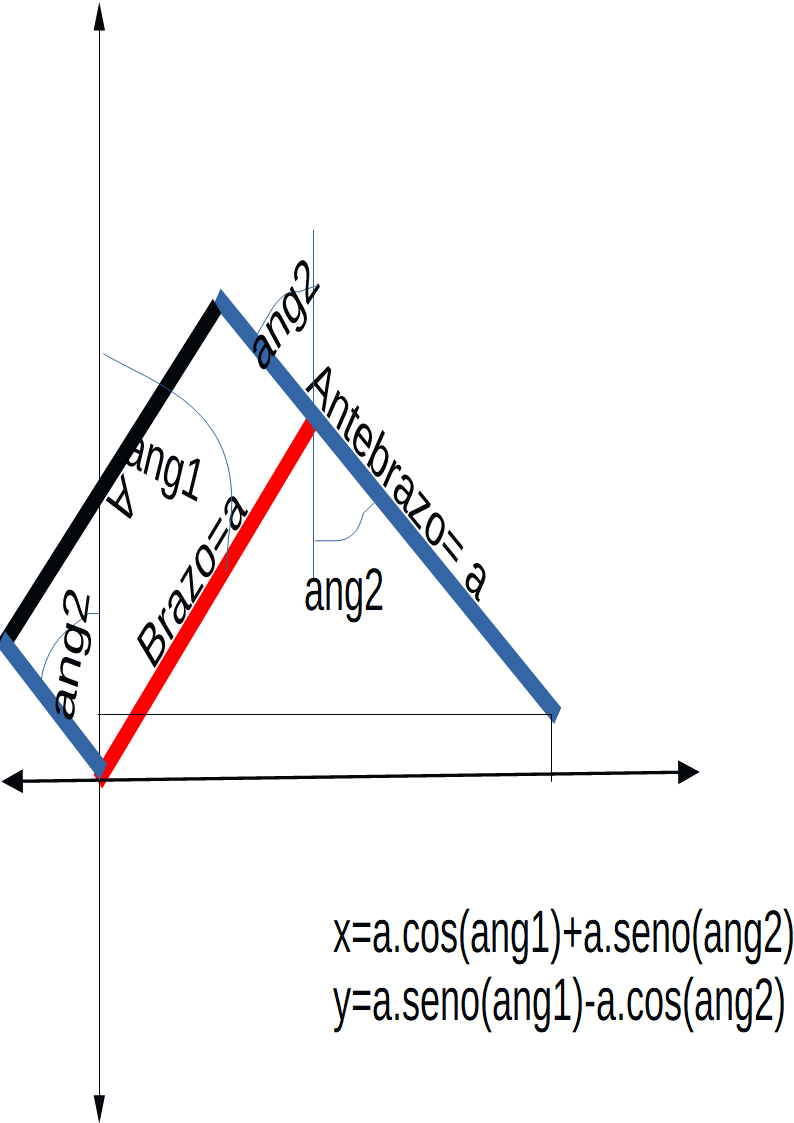

La ecuacion del movimiento seria:

x=a.$\cos$(ang1)+a.$\sin$(ang2)

y=a.$\sin$(ang1)-a.$\cos$(ang2)

Se observa que la posicion del brazo depende de dos angulos ang1 y ang2. Los cuales corresponderian a los angulos de los dos servomotores. Pero es conveniente que la posicion de 90° del ang1 y ang2 sea con el brazo vertical. Entonces 

ang1=angs1-90

ang2=angs2-90

El sistema de ecuaciones queda:

x=a.$\sin$(angs1)+a.$\cos$(angs2))

y=a.$\cos$(angs1)-a. $\sin$(angs2))

Jupyter notebook no tiene definido sin, cos por lo tanto debemos cargar la libreria numpy




In [11]:
import numpy as np

o1=30
o2=30
x=150*(np.sin(o1/180*3.1415)+np.cos(o2/180*3.1415))
y=150*(np.cos(o1/180*3.1415)-np.sin(o2/180*3.1415))
dd='x='+str(x)+' y='+str(y)+'/n'
print(dd)

x=204.90296270404437 y=54.906974740054636/n


### Segundo programa

Aqui se presenta un programa que tiene como entrada los angulos, calcula la posicion x e y donde se ubicara el brazo finalmente se comunica por el puerto serie con el microcontrolador y se ubica en la posicion indicada.


In [126]:
# librerias necesarias para el programa

from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import serial
import numpy as np

tang1 = widgets.Text(value='90',description='Ang 1=', )
tang2 = widgets.Text(value='90',description='Ang 2=', )
boton = widgets.Button(description='Boton')
brazo = widgets.Button(description='Brazo')
abrazo = widgets.Button(description='Antebrazo')
lab1=widgets.Label(value="Entrada:")
lab2=widgets.Label(value="Salida:")
out = widgets.Output()
b1=widgets.HBox([lab1,tang1,tang2 ])
b2=widgets.HBox([lab2,boton,out])
b3=widgets.HBox([brazo,abrazo])
def on_boton_click(_):
      with out:
          # Acciones
          clear_output()
          o1=float(tang1.value)
          o2=float(tang2.value)
          to1= 'o1'+'{:03d}'.format(int(tang1.value))
          to2= 'o2'+'{:03d}'.format(int(tang1.value))
          x=150*(np.sin(o1/180*3.1415-3.1415/2)+np.cos(3.1415-o2/180*3.1415))
          y=150*(np.cos(o1/180*3.1415-3.1415/2)-np.sin(3.1415-o2/180*3.1415))
          ssx=str(x)
          ssy=str(y) 
         
          print('x='+ssx+' y='+ssy+' o1='+to1+' o2='+to2)
def on_brazo_click(_):
      with out:
          # Accione
          clear_output()
          to1= 'o1'+'{:03d}'.format(int(tang1.value))
          ser = serial.Serial('COM11')
          ser.write(bytearray(to1,'utf-8'))
          ser,close()
          print('o1= '+to1)
def on_abrazo_click(_):
      with out:
          # Acciones
          clear_output()
          to2= 'o2'+'{:03d}'.format(int(tang2.value))
          ser.write(bytearray(to2,'utf-8'))
          print('o2= '+to2)
boton.on_click(on_boton_click)
brazo.on_click(on_brazo_click)
abrazo.on_click(on_abrazo_click)


widgets.VBox([b1,b2,b3])

###  Calculo de Coordenadas del brazo

El brazo debe poder ubicarse en una posicion determinada. Lo que significa que se debe resolver el sistema de ecuaciones mostrado, porque nuestras incognitas son los angulos que deseamos medir. Por esta razon utilizaremos la libreria optimize

In [ ]:
import numpy as np
from scipy.optimize import fsolve
def coorde(z,x00,y00):
    o1=z[0]
    o2=z[1]
    F=np.empty((2))
    F[0]=150*(np.sin(o1/180*3.1415-3.1415/2)+np.cos(3.1415-o2/180*3.1415))-x00
    F[1]=150*(np.cos(o1/180*3.1415-3.1415/2)-np.sin(3.1415-o2/180*3.1415))-y00
    return F
x00=0
y00=0
zGuess = np.array([1,1,1])
z = fsolve(coorde,zGuess)
print(z)


In [193]:
rg

[91.91026951 91.9076151 ]


In [2]:
# librerias necesarias para el programa

from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import serial
import numpy as np
from scipy.optimize import fsolve


tx0 = widgets.Text(value='0',description='x=', )
ty0 = widgets.Text(value='0',description='y=', )
boton = widgets.Button(description='mover')
lab1=widgets.Label(value="Coordenadas:")
lab2=widgets.Label(value="Angulos:")
lab3=widgets.Label(value="Coordenadas:")
lab4=widgets.Label(value="Coordenadas:")
out = widgets.Output()
b1=widgets.HBox([lab1,tx0,ty0 ])
b2=widgets.HBox([boton,out])
b3=widgets.HBox([lab2,lab3,lab4])
def coorde(z,x00,y00):
    o1=z[0]
    o2=z[1]
    F=np.empty((2))
    F[0]=150*(sin(o1/180*3.1415-3.1415/2)+cos(3.1415-o2/180*3.1415))-x00
    F[1]=150*(cos(o1/180*3.1415-3.1415/2)-sin(3.1415-o2/180*3.1415))-y00
    return F
  
def on_boton_click(_):
      with out:
          # Acciones
          clear_output()
          x00=float(tx0.value)
          y00=float(ty0.value)
          z = fsolve(coorde,[1,1],args=(x00,y00))
          so1='o1'+'{:03d}'.format(int(z[0]+0.1))
          so2='o2'+'{:03d}'.format(int(z[1]+0.1))
          ser.write(bytearray(so1,'utf-8'))
          ser.write(bytearray(so2,'utf-8'))
          print('o1='+so1+' o2='+so2)
          #print(z)
boton.on_click(on_boton_click)
widgets.VBox([b1,b2])